In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


 **1]. DATA ANALYSIS AND CLEANING**

In [21]:
df=pd.read_csv("https://raw.githubusercontent.com/Suyog-Khadke/HearDiseasePrediction/main/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [22]:
catogaryColumn = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
continuesColumn = ["age","trestbps","chol","thalach","oldpeak"]

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[continuesColumn] = scaler.fit_transform(df[continuesColumn]) #only normalize continus data 

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0


In [27]:
x=df.drop(columns="target")
y=df["target"]


**2]. DATA VISUALIZATION AND FEATURES COMPARISION**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


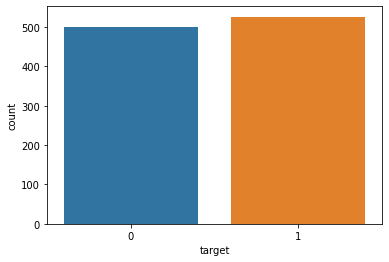

In [28]:
from itertools import cycle

import seaborn as sns
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

sns.countplot(y)
plt.show()

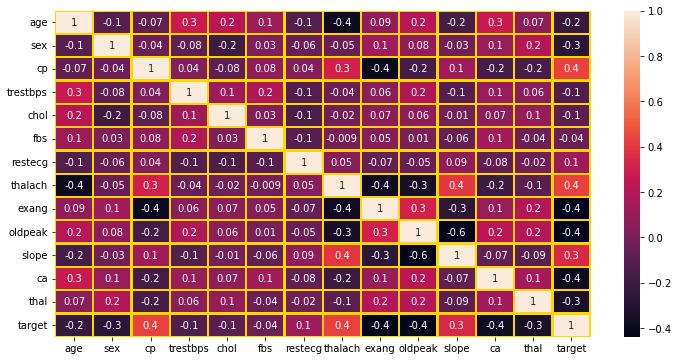

In [29]:
plt.figure(figsize =(12,6))
sns.heatmap(df.corr(),robust=True,fmt='.1g',linewidths=1.3,linecolor='gold',annot=True);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


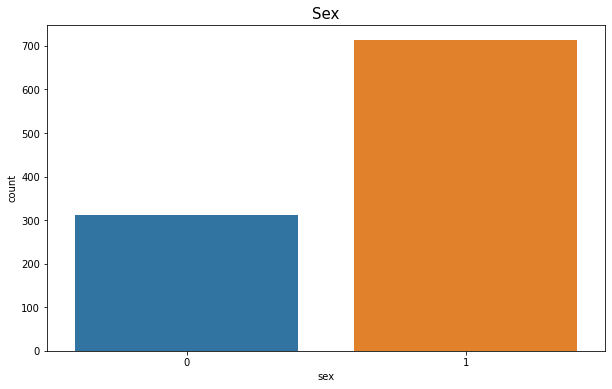

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(df["sex"])
plt.title("Sex", size=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


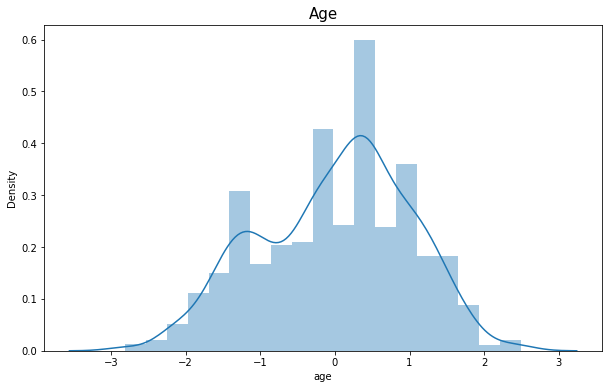

In [31]:
plt.figure(figsize=(10,6))
sns.distplot(df["age"])
plt.title("Age", size=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


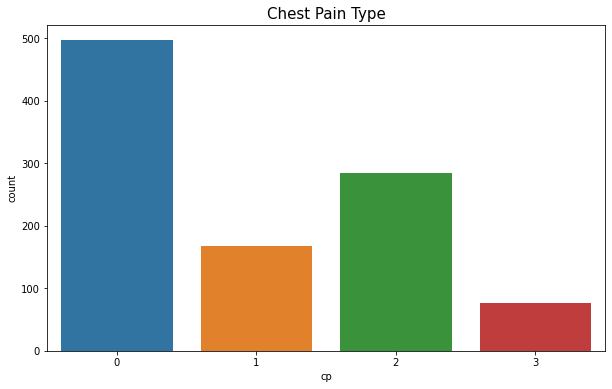

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(df["cp"])
plt.title("Chest Pain Type", size=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


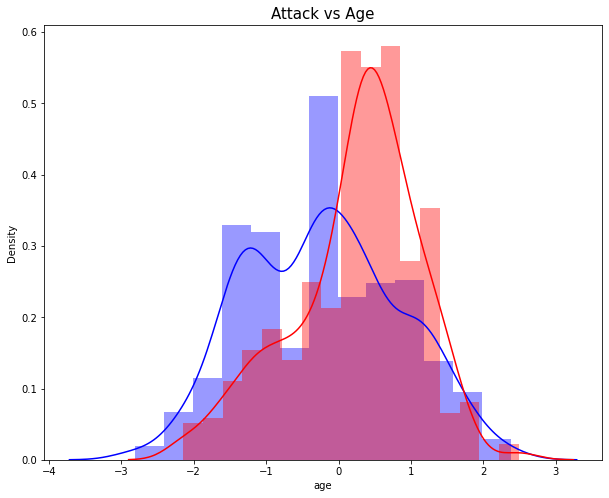

In [34]:
plt.figure(figsize=(10,8))
sns.distplot(df[df["target"]==1]["age"], color="blue")
sns.distplot(df[df["target"]==0]["age"], color="red")
plt.title("Attack vs Age", size=15)
plt.show()

**3]. A) Machine learning model (SVM)**

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)

In [36]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 

SVC(kernel='linear')

In [37]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred)


0.8195121951219512

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.71      0.80       107
           1       0.75      0.94      0.83        98

    accuracy                           0.82       205
   macro avg       0.84      0.82      0.82       205
weighted avg       0.84      0.82      0.82       205



**B) Machine learning model (LogisticRegression)**

In [40]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [41]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,1,1,0.479107,-0.484803,0,1,0.647366,1,-0.912329,2,0,2
1021,0.613800,1,0,-0.377636,0.232705,0,0,-0.352873,1,1.471705,1,1,3
1022,-0.819834,1,0,-1.234378,0.562371,0,0,-1.353113,1,-0.060888,1,1,2
1023,-0.488996,0,0,-1.234378,0.155137,0,0,0.429923,0,-0.912329,2,0,2


In [42]:
y_pred_lr = lr.predict(X_test)

In [43]:
accuracy_score(y_test, y_pred_lr)

0.8195121951219512

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.92      0.72      0.81       107
           1       0.75      0.93      0.83        98

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.84      0.82      0.82       205



In [45]:
X_c = np.c_[np.ones((x.shape[0], 1)), x]
y_c = y[:, np.newaxis]
theta = np.zeros((X_c.shape[1], 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [46]:
theta.shape

(14, 1)

In [47]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    return np.dot(x, theta)

def probability(theta, x):
    return sigmoid(net_input(theta, x))

In [48]:
def cost_function(theta, x, y):
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost


In [49]:
cost_function(theta,X_c,y_c)

0.6931471805599454

# C) Machine learning model (KNN)

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
score = accuracy_score(y_test, predictions)
print("KNeighborsClassifier: ", score)

KNeighborsClassifier:  0.8390243902439024


In [51]:
score_list=[]

for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train, y_train)
    predictions = knn2.predict(X_test)
    score_list.append(accuracy_score(predictions, y_test))

Text(0, 0.5, 'Score')

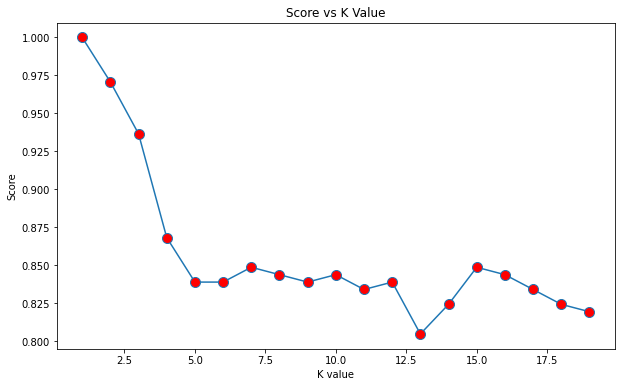

In [52]:
plt.figure(figsize =(10, 6))
plt.plot(range(1, 20), score_list, marker ='o', markerfacecolor ='red', markersize = 10)
  
plt.title('Score vs K Value',)
plt.xlabel('K value')
plt.ylabel('Score')

In [53]:
knn3 = KNeighborsClassifier(n_neighbors=7)
knn3.fit(X_train, y_train)
predictions = knn3.predict(X_test)
score = accuracy_score(y_test, predictions)
print("KNeighborsClassifier: ", score)

KNeighborsClassifier:  0.848780487804878


# D)Naive Bayes Algorithm

In [54]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(X_train, y_train)
predictions = GNB.predict(X_test)
score = accuracy_score(y_test, predictions)
print("GaussianNB: ", score)

new_row = {"Model": "GaussianNB", "Accuracy Score": score}


GaussianNB:  0.8048780487804879
